In [1]:
import pandas as pd
# Data visualization
import seaborn as sns
from matplotlib import pyplot as plt
# Machine Learning
import tensorflow as tf

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Read in Data
#### Data is from Stanford's CS20 course notes on GitHub.
https://github.com/chiphuyen/stanford-tensorflow-tutorials

In [2]:
df = pd.read_csv('./data/birth_life_2010.csv')
df.head()

,Country,Birth rate,Life expectancy
0,Vietnam,1.822,74.828244
1,Vanuatu,3.869,70.819488
2,Tonga,3.911,72.150659
3,Timor-Leste,5.578,61.999854
4,Thailand,1.579,73.927659


In [3]:
# Style plot.
plt.style.use('ggplot')

### Visualize Data 
Given the a countries birth rate the model will return that countries life expectancy.

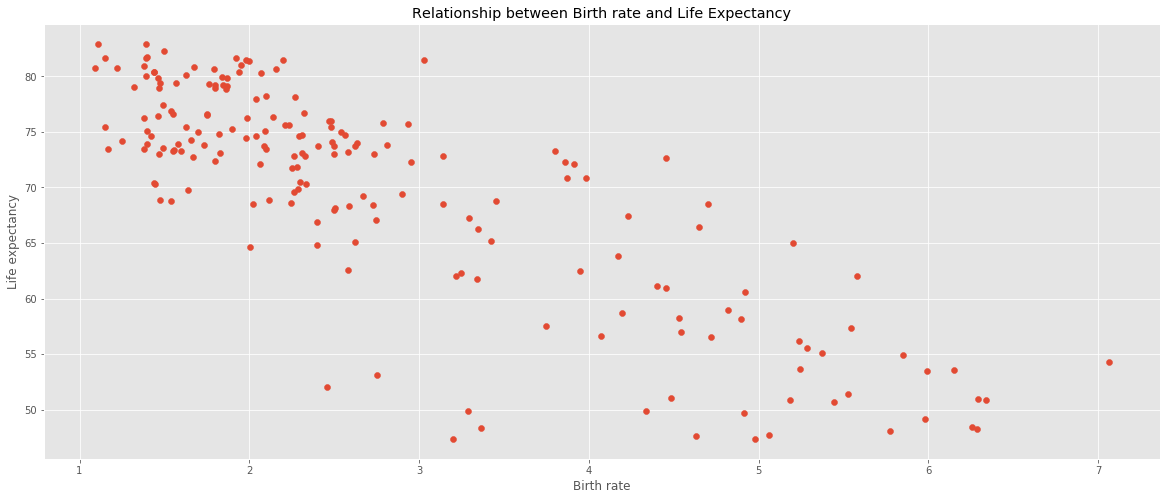

In [4]:
plt.figure(figsize=(20, 8))
plt.title('Relationship between Birth rate and Life Expectancy')
plt.xlabel('Birth rate')
plt.ylabel('Life expectancy')
plt.scatter(df['Birth rate'], df['Life expectancy'])
plt.show()

### Put data into array for Machine Learning 

In [5]:
input_X = df['Birth rate'].as_matrix().reshape(-1, 1)
# print(input_X)

In [6]:
input_Y = df['Life expectancy'].as_matrix().reshape(-1,1)
# print(input_Y)

### Build Neural Network

In [7]:
# Hyperparameters
learning_rate = 0.2
epochs = 2000
batch_size = 25

In [8]:
X = tf.placeholder(tf.float32, shape=(None, 1))
Y = tf.placeholder(tf.float32, shape=(None, 1))

# create weight
w = tf.Variable(tf.zeros([1, 1]), name='Weight')

# create bias
b = tf.Variable(tf.random_normal([1]), name='Bias')

Y_hat = tf.matmul(X, w) + b

# loss function
loss = tf.reduce_mean(tf.square(Y_hat - Y))

# create a summary for our loss function.
tf.summary.scalar('loss', loss)

tf.summary.merge_all()

<tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>

In [9]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

### Training

In [10]:
sess = tf.Session()

with sess.as_default():
    # initialize 
    sess.run(tf.global_variables_initializer())
    writer = tf.summary.FileWriter('./expectancy0', sess.graph)
    

#training 
for i in range(epochs):
        
    sess.run([optimizer], 
              feed_dict = {
              X: input_X, 
              Y: input_Y
            })
    
        
    
    if (i) % 5 == 0:       
        cc = sess.run(loss, feed_dict={ X: input_X, Y: input_Y})
         
        print(f'Epochs: {i}/{epochs}', 'Loss:', '{:.9f}'.format(cc))
print('Optimization Finished!')
training_loss = sess.run(loss, feed_dict={ X: input_X, Y: input_Y })
print('Final Loss: ', training_loss, 'Final Weight: ', sess.run(w), 'Bias: ', sess.run(b))  

writer.close()

Epochs: 0/2000 Loss: 4714.560058594
Epochs: 5/2000 Loss: 4237.601562500
Epochs: 10/2000 Loss: 3797.170166016
Epochs: 15/2000 Loss: 3395.058105469
Epochs: 20/2000 Loss: 3032.151611328
Epochs: 25/2000 Loss: 2708.400634766
Epochs: 30/2000 Loss: 2422.874267578
Epochs: 35/2000 Loss: 2173.885253906
Epochs: 40/2000 Loss: 1959.145507812
Epochs: 45/2000 Loss: 1775.933837891
Epochs: 50/2000 Loss: 1621.257568359
Epochs: 55/2000 Loss: 1491.992919922
Epochs: 60/2000 Loss: 1385.005249023
Epochs: 65/2000 Loss: 1297.247070312
Epochs: 70/2000 Loss: 1225.832519531
Epochs: 75/2000 Loss: 1168.093627930
Epochs: 80/2000 Loss: 1121.616821289
Epochs: 85/2000 Loss: 1084.264282227
Epochs: 90/2000 Loss: 1054.180419922
Epochs: 95/2000 Loss: 1029.787109375
Epochs: 100/2000 Loss: 1009.768737793
Epochs: 105/2000 Loss: 993.049987793
Epochs: 110/2000 Loss: 978.770385742
Epochs: 115/2000 Loss: 966.254272461
Epochs: 120/2000 Loss: 954.983215332
Epochs: 125/2000 Loss: 944.567687988
Epochs: 130/2000 Loss: 934.721069336
Ep

Epochs: 1135/2000 Loss: 41.078304291
Epochs: 1140/2000 Loss: 40.718170166
Epochs: 1145/2000 Loss: 40.368728638
Epochs: 1150/2000 Loss: 40.029705048
Epochs: 1155/2000 Loss: 39.700828552
Epochs: 1160/2000 Loss: 39.381832123
Epochs: 1165/2000 Loss: 39.072460175
Epochs: 1170/2000 Loss: 38.772499084
Epochs: 1175/2000 Loss: 38.481681824
Epochs: 1180/2000 Loss: 38.199748993
Epochs: 1185/2000 Loss: 37.926479340
Epochs: 1190/2000 Loss: 37.661613464
Epochs: 1195/2000 Loss: 37.404972076
Epochs: 1200/2000 Loss: 37.156311035
Epochs: 1205/2000 Loss: 36.915443420
Epochs: 1210/2000 Loss: 36.682117462
Epochs: 1215/2000 Loss: 36.456157684
Epochs: 1220/2000 Loss: 36.237331390
Epochs: 1225/2000 Loss: 36.025451660
Epochs: 1230/2000 Loss: 35.820354462
Epochs: 1235/2000 Loss: 35.621822357
Epochs: 1240/2000 Loss: 35.429691315
Epochs: 1245/2000 Loss: 35.243766785
Epochs: 1250/2000 Loss: 35.063861847
Epochs: 1255/2000 Loss: 34.889827728
Epochs: 1260/2000 Loss: 34.721477509
Epochs: 1265/2000 Loss: 34.558670044
E

## Linear Regression Model 

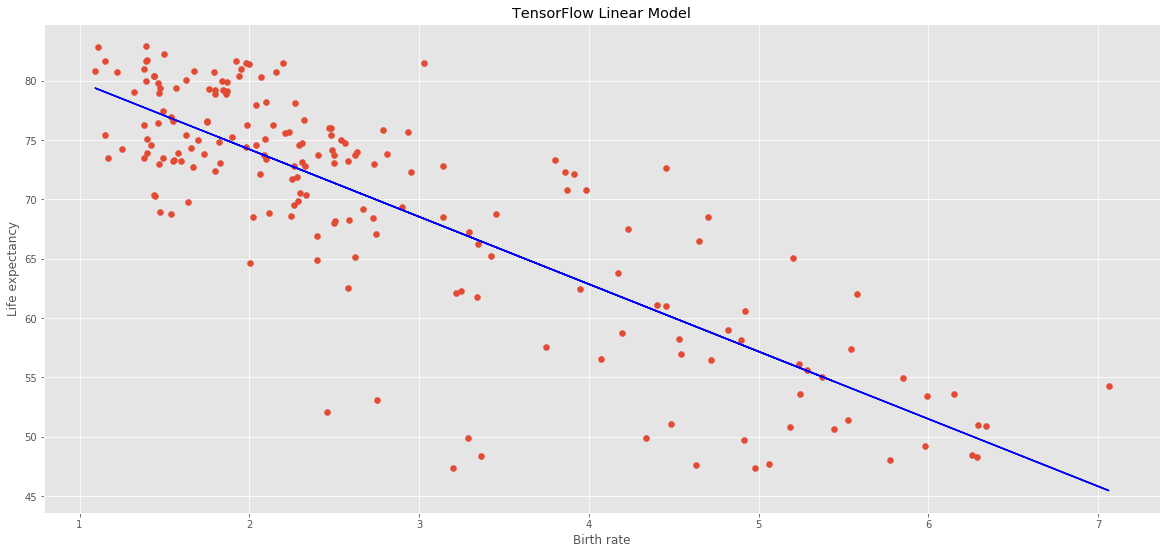

In [11]:
plt.figure(figsize=(20,9))
plt.title('TensorFlow Linear Model')
plt.xlabel('Birth rate')
plt.ylabel('Life expectancy')
plt.scatter(df['Birth rate'], df['Life expectancy'])
plt.plot(input_X,sess.run(w) * input_X + sess.run(b), c='b')
plt.show()

### Make Prediction
#### What if the Birth rate of some country was 3.821 what would are model predict?

In [12]:
sess.run(Y_hat, feed_dict={X:[[3.821]]})

array([[63.878483]], dtype=float32)

### TensorBoard 

Lets use tensorboard to look at the graph.

In [13]:
!tensorboard --logdir='./expectancy0'

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
2018-05-09 15:17:48.256987: I tensorflow/core/platform/cpu_feature_guard.cc:140] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
W0509 15:17:48.282446 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0509 15:17:48.285262 Reloader tf_logging.py:121] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0509 15:17:48.289173 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one 

W0509 15:17:48.513900 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0509 15:17:48.521090 Reloader tf_logging.py:121] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0509 15:17:48.528484 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0509 15:17:48.533644 Reloader tf_logging.py:121] Found more than one metagraph event per run. Overwriting the metagraph with the newest event.
W0509 15:17:48.542250 Reloader tf_logging.py:121] Found more than one graph event per run, or there was a metagraph containing a graph_def, as well as one or more graph events.  Overwriting the graph with the newest event.
W0509 15:17:48.549636 Reloader tf_logging.p

^C
